In [3]:
import numpy as np
import os
import json

from tools import create_distances
from tools.grasp_multiprocessing_MAB import multi_GRASP_Bandit
from tools.fine_tuning import contar_soluciones_en_pareto, graficar_boxplots, graficar_boxplots_comparativo, borrar_resultados_hashtag

import multiprocessing
from tqdm import tqdm


In [4]:
archive = "WorkSpace 1000_50_5"
k=5
m=50
context_size=3

In [5]:
max_iterations=5

In [6]:
alpha=0.3
#beta=0.2
learning_rate=1

In [7]:
create_distances.create_distances(archive)

In [8]:
def ejecutar_con_pool_alpha(archive, k, m, context_size, max_iterations, beta, learning_rate):
    """
    Ejecuta la función multi_GRASP_Bandit 110 veces en paralelo.

    Las ejecuciones se dividen en 11 grupos de 10. Cada grupo tiene un
    valor de alpha diferente, comenzando en 0.0 para el primer grupo y
    aumentando en 0.1 hasta llegar a 1.0 en el último.

    Args:
        archive: El parámetro 'archive' para multi_GRASP_Bandit.
        k: El parámetro 'k' para multi_GRASP_Bandit.
        m: El parámetro 'm' para multi_GRASP_Bandit.
        context_size: El parámetro 'context_size' para multi_GRASP_Bandit.
        max_iterations: El parámetro 'max_iterations' para multi_GRASP_Bandit.
        betha: El parámetro 'betha' para multi_GRASP_Bandit.
        learning_rate: El parámetro 'learning_rate' para multi_GRASP_Bandit.
    """
    # Genera la lista de 11 valores para alpha, de 0.0 a 1.0
    # np.linspace(0, 1, 11) crea [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    alphas = np.linspace(0, 1, 11)
    
    lista_de_argumentos = []
    corrida_id_counter = 1

    # Itera sobre cada valor de alpha
    for alpha_val in alphas:
        # Para cada alpha, crea 20 ejecuciones (corridas)
        for _ in range(20):
            argumentos = (archive, k, m, context_size, max_iterations, alpha_val, beta, learning_rate, corrida_id_counter)
            lista_de_argumentos.append(argumentos)
            corrida_id_counter += 1
            
    # Usa un pool de procesos para ejecutar todas las tareas en paralelo
    with multiprocessing.Pool() as pool:
        # starmap es útil cuando los argumentos de la función son tuplas
        pool.starmap(multi_GRASP_Bandit, lista_de_argumentos)


In [9]:
def ejecutar_con_pool_beta(archive, k, m, context_size, max_iterations, alpha, learning_rate):
    """
    Ejecuta la función multi_GRASP_Bandit 110 veces en paralelo.

    Las ejecuciones se dividen en 11 grupos de 10. Cada grupo tiene un
    valor de alpha diferente, comenzando en 0.0 para el primer grupo y
    aumentando en 0.1 hasta llegar a 1.0 en el último.

    Args:
        archive: El parámetro 'archive' para multi_GRASP_Bandit.
        k: El parámetro 'k' para multi_GRASP_Bandit.
        m: El parámetro 'm' para multi_GRASP_Bandit.
        context_size: El parámetro 'context_size' para multi_GRASP_Bandit.
        max_iterations: El parámetro 'max_iterations' para multi_GRASP_Bandit.
        betha: El parámetro 'betha' para multi_GRASP_Bandit.
        learning_rate: El parámetro 'learning_rate' para multi_GRASP_Bandit.
    """
    # Genera la lista de 11 valores para alpha, de 0.0 a 1.0
    # np.linspace(0, 1, 11) crea [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    bethas = np.linspace(0, 1, 11)
    
    lista_de_argumentos = []
    corrida_id_counter = 1

    # Itera sobre cada valor de alpha
    for betha_val in bethas:
        # Para cada alpha, crea 20 ejecuciones (corridas)
        for _ in range(20):
            argumentos = (archive, k, m, context_size, max_iterations, alpha, betha_val, learning_rate, corrida_id_counter)
            lista_de_argumentos.append(argumentos)
            corrida_id_counter += 1
            
    # Usa un pool de procesos para ejecutar todas las tareas en paralelo
    with multiprocessing.Pool() as pool:
        # starmap es útil cuando los argumentos de la función son tuplas
        pool.starmap(multi_GRASP_Bandit, lista_de_argumentos)


In [10]:
ruta_borrado=f"Solutions/Multiprocessing/{archive}"
borrar_resultados_hashtag(ruta_borrado)

Buscando archivos con '#' en la carpeta: Solutions/Multiprocessing/WorkSpace 1000_50_5


In [11]:
for i in tqdm(range(2000), desc="Ejecutando GRASP"):
    ejecutar_con_pool_beta(archive, k, m, context_size, max_iterations, alpha, learning_rate)

Ejecutando GRASP:   0%|          | 0/2000 [00:00<?, ?it/s]

Ejecutando GRASP:   0%|          | 2/2000 [00:16<4:34:21,  8.24s/it]


KeyboardInterrupt: 

In [44]:
# Llamar a la función principal (procesará hasta el número 5, aunque solo existan 4)
vector_de_conteos = contar_soluciones_en_pareto(archive, total_corridas=220)

✅ Frente de Pareto cargado desde 'Pareto_front/WorkSpace 1000_50_5.csv'. Contiene 18 soluciones.


# Guardar conteos

In [ ]:
nombre_archivo = "Results_finetuning/beta_2000.json"

In [46]:
if not os.path.exists(nombre_archivo):
    with open(nombre_archivo, 'w') as f:
        for elemento in vector_de_conteos:
            f.write(str(elemento) + '\n')
    print(f"✅ Archivo de texto '{nombre_archivo}' creado.")
else:
    print(f"⚠️ El archivo '{nombre_archivo}' ya existe.")

✅ Archivo de texto 'Results_finetuning/alpha_6000.json' creado.


# Leer conteos

In [5]:
nombre_archivo = "Results_finetuning/alpha_6000.json"

In [6]:
vector_de_conteos = []
with open(nombre_archivo, 'r') as f:
    for linea in f:
        # strip() elimina espacios en blanco y saltos de línea
        # float() convierte el texto a número (usa int() si solo tienes enteros)
        vector_de_conteos.append(float(linea.strip()))

print("Lista cargada:", vector_de_conteos)

Lista cargada: [14.0, 11.0, 10.0, 11.0, 13.0, 11.0, 11.0, 11.0, 10.0, 13.0, 10.0, 10.0, 11.0, 9.0, 11.0, 11.0, 14.0, 10.0, 11.0, 11.0, 11.0, 13.0, 13.0, 13.0, 10.0, 14.0, 14.0, 12.0, 11.0, 9.0, 12.0, 15.0, 11.0, 12.0, 14.0, 12.0, 12.0, 11.0, 11.0, 15.0, 14.0, 11.0, 12.0, 12.0, 12.0, 10.0, 14.0, 12.0, 10.0, 12.0, 7.0, 12.0, 14.0, 14.0, 10.0, 13.0, 11.0, 12.0, 11.0, 12.0, 14.0, 10.0, 11.0, 9.0, 13.0, 14.0, 14.0, 13.0, 12.0, 12.0, 14.0, 14.0, 12.0, 11.0, 14.0, 15.0, 12.0, 14.0, 16.0, 12.0, 9.0, 12.0, 13.0, 12.0, 8.0, 12.0, 10.0, 13.0, 15.0, 12.0, 11.0, 12.0, 11.0, 11.0, 9.0, 10.0, 11.0, 11.0, 12.0, 8.0, 9.0, 9.0, 13.0, 10.0, 11.0, 12.0, 9.0, 9.0, 11.0, 12.0, 13.0, 9.0, 13.0, 13.0, 13.0, 11.0, 12.0, 13.0, 10.0, 11.0, 13.0, 9.0, 8.0, 13.0, 10.0, 12.0, 12.0, 8.0, 13.0, 13.0, 11.0, 12.0, 11.0, 12.0, 13.0, 12.0, 14.0, 12.0, 12.0, 10.0, 11.0, 11.0, 9.0, 10.0, 11.0, 14.0, 11.0, 11.0, 10.0, 14.0, 8.0, 12.0, 7.0, 12.0, 11.0, 10.0, 10.0, 12.0, 13.0, 10.0, 10.0, 12.0, 9.0, 12.0, 9.0, 10.0, 11.0, 12.

In [6]:
np.mean(vector_de_conteos)

np.float64(11.14090909090909)

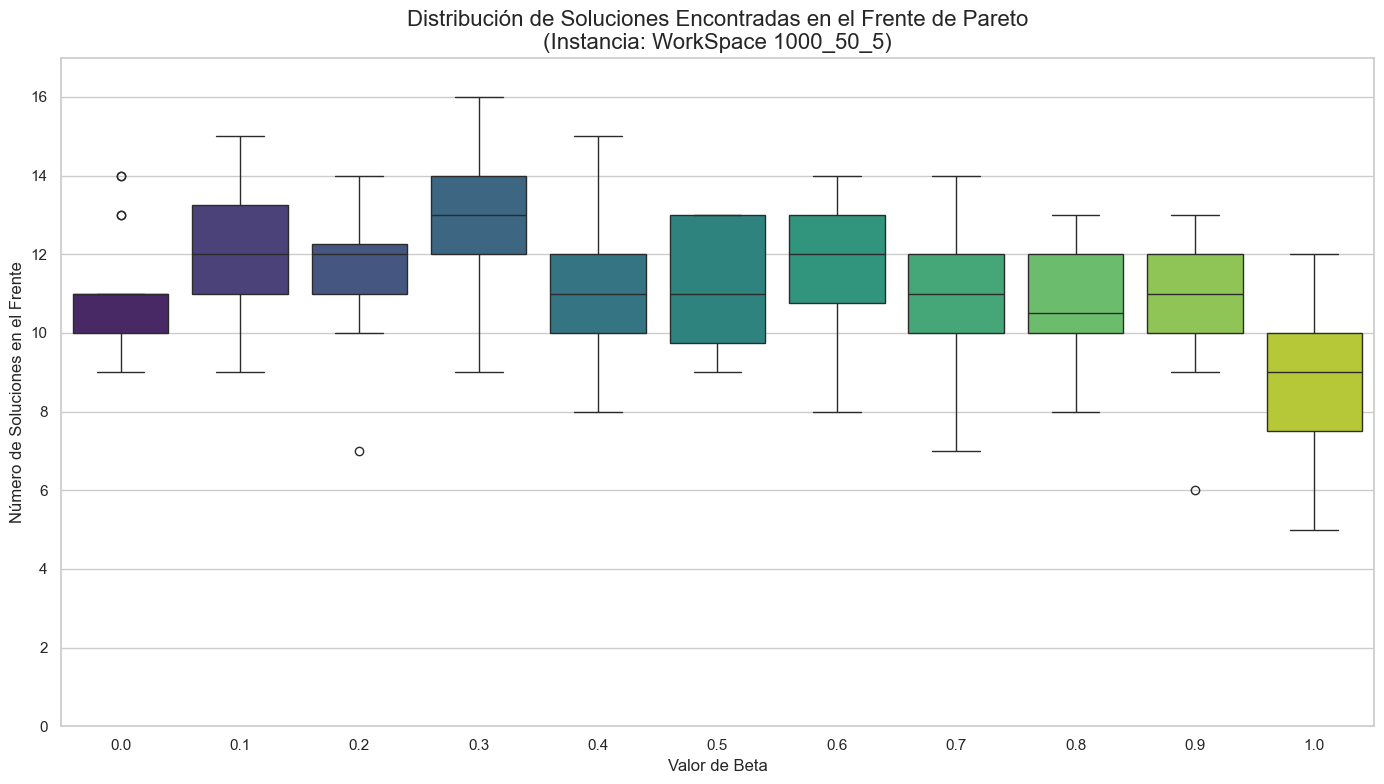

In [7]:
graficar_boxplots(vector_de_conteos, archive)

# Todas las gráficas juntas

In [5]:
nombre_archivo_2000 = "Results_finetuning/alpha_2000.json"
nombre_archivo_4000 = "Results_finetuning/alpha_4000.json"
nombre_archivo_6000 = "Results_finetuning/alpha_6000.json"

In [6]:
v1 = []
with open(nombre_archivo_2000, 'r') as f:
    for linea in f:
        # strip() elimina espacios en blanco y saltos de línea
        # float() convierte el texto a número (usa int() si solo tienes enteros)
        v1.append(float(linea.strip()))

v2 = []
with open(nombre_archivo_4000, 'r') as f:
    for linea in f:
        # strip() elimina espacios en blanco y saltos de línea
        # float() convierte el texto a número (usa int() si solo tienes enteros)
        v2.append(float(linea.strip()))


v3 = []
with open(nombre_archivo_6000, 'r') as f:
    for linea in f:
        # strip() elimina espacios en blanco y saltos de línea
        # float() convierte el texto a número (usa int() si solo tienes enteros)
        v3.append(float(linea.strip()))

In [7]:
nombres_modelos=["2000 iteraciones", "4000 iteraciones", "6000 iteraciones"]

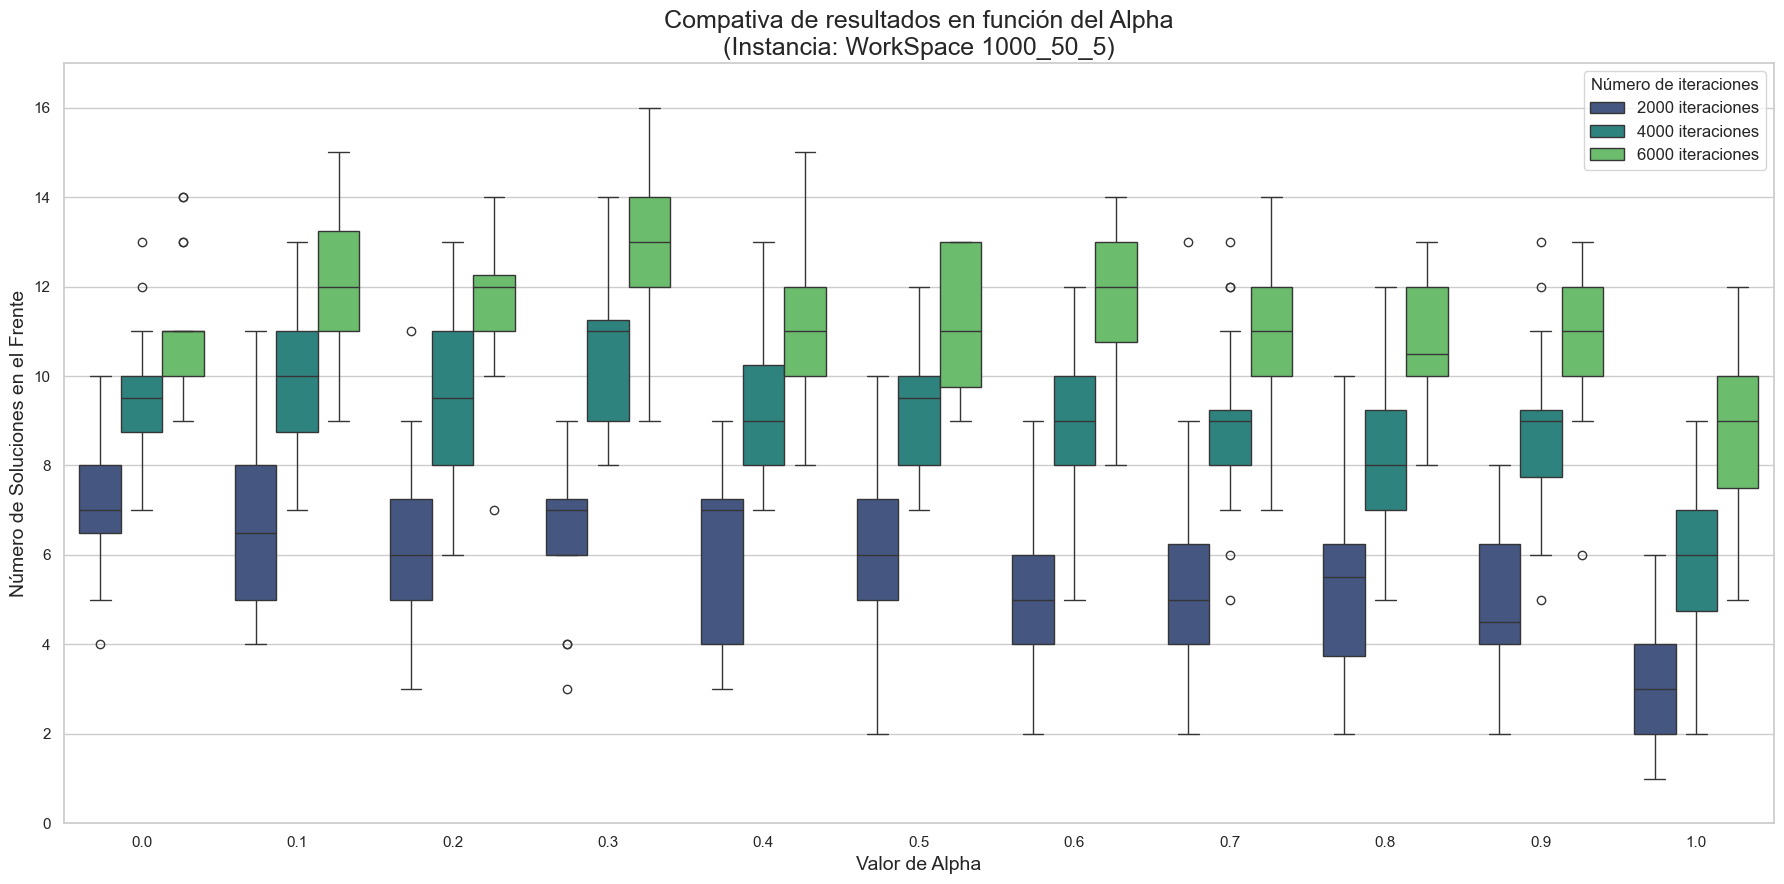

In [8]:
graficar_boxplots_comparativo(
    v1,
    v2,
    v3,
    nombres_modelos,
    archive,
)